# Data exploration

In this notebook we look at the data we are gonna use.

In [43]:
import json
import os
import random
from image_to_poem.data.kaggle_poems import KagglePoems
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = '../data/'

## Kaggle poems

The Kaggle poems consists of two sub data sets: "topics" and "forms". In topics the poems are sorted into folders depending on the topics they describe. In forms the poems are sorted into folders depending on the form they are written in. We will use the topics data set.

### Topics exploration

Below we take a look at the available topics.

In [2]:
topics = os.listdir(DATA_PATH+"kaggle_poems/topics")
print(f"There are {len(topics)} topics in the dataset.")

There are 144 topics in the dataset.


In [3]:
topic_counts = {}

for topic in topics:
    topic_counts[topic] = len(os.listdir(DATA_PATH+"kaggle_poems/topics/"+topic))

print(f"Each topic has between {min(topic_counts.values())} and {max(topic_counts.values())} poems.")

Each topic has between 97 and 100 poems.


### Poems exploration

In [5]:
poems = KagglePoems("../data/kaggle_poems/")
poems.stats

Reading poems:  20%|██        | 2876/14331 [00:00<00:01, 6876.31it/s]

Could not read ../data/kaggle_poems/topics/chicago/ChicagoPoemsOfComptonImNotTheLeastBitAfraidToTheThoughtOfChicagoIDrinkCoolAideOrLemonadeCosaNostraByThemICouldNeverDieTheFbiLikeStandingNextToAFlyPoembyJoshuaAaronGuillory.txt
Could not read ../data/kaggle_poems/topics/chicago/ChicagoPoemsOfComptonImNotTheLeastBitAfraidToTheThoughtOfChicagoIDrinkKoolAidOrLemonadeCosaNostraByThemICouldNeverDieTheFbiLikeStandingNextToAFlyPoembyJoshuaAaronGuillory.txt


Reading poems:  71%|███████   | 10105/14331 [00:01<00:00, 6540.37it/s]

Could not read ../data/kaggle_poems/topics/racism/RacismPoemsTranslationOfRacismIsAroundMeEverywhereByFrancisDugganαªåαª«αª░αªÜαª░αª¬αª╢αª¢αº£αºƒαªåαª¢αª£αªñαª¼αªªαª¼αª╖αª«αª▓αª½αª░αª¿αª╕αª╕αªíαªùαª¿PoembyAlamSayed.txt


Reading poems: 100%|██████████| 14331/14331 [00:02<00:00, 6520.28it/s]


{'num_poems': 14331,
 'num_words': 2631184,
 'vocab_size': 174557,
 'avg_poem_length': 183.60086525713487}

Let's take a look at an example poem.

In [6]:
poems.get_example()

File index: 8458
Topic: music
Title: Young Laughters And My Music
Author: Augusta Davies Webster
------------------------------------
Young laughters, and my music! Aye till now
The voice can reach no blending minors near;
'Tis the bird's trill because the spring is here
And spring means trilling on a blossomy bough;
'Tis the spring joy that has no why or how,
But sees the sun and hopes not nor can fear--
Spring is so sweet and spring seems all the year.
Dear voice, the first-come birds but trill as thou.
Oh music of my heart, be thus for long:
Too soon the spring bird learns the later song;
Too soon a sadder sweetness slays content
Too soon! There comes new light on onward day,
There comes new perfume o'er a rosier way:
Comes not again the young spring joy that went.


## MultiM poem images

The MultiM data set consists of images along with poems. We will only use the images.

Image ID: 62
Image URL: https://farm8.staticflickr.com/7302/10468902856_4d10b8a5d4.jpg


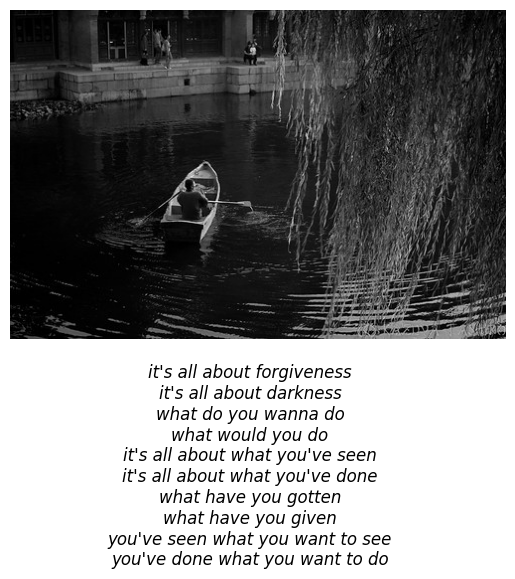

In [106]:
# load image json
image_json = json.load(open(DATA_PATH + "multim_poem.json"))

# choose random image
idx = random.randint(0, 100)
# idx = 64

# print info
print("Image ID:", image_json[idx]["id"])
print("Image URL:", image_json[idx]["image_url"])

# display image
img = Image.open(DATA_PATH + "poem_images/" + str(image_json[idx]["id"]) + ".jpg")
plt.imshow(img)
plt.axis('off')

y_text = 0.1 if img.size[0] > img.size[1] else img.size[0]/img.size[1]*0.1
plt.figtext(0.5, y_text, image_json[idx]["poem"], horizontalalignment='center', fontsize=12, verticalalignment ="top", style ="italic", wrap=True)

plt.show()



In [53]:
25/np.array(img).shape[0]

0.06666666666666667

Text(0.5, -0.5, 'i remember you as you were in the last autumn\nyou were the grey beret and the still heart\nin your eyes the flames of the twilight fought on\nand the leaves fell in the water of your soul\nclasping my arms like a climbing plant\nthe leaves garnered your voice that was slow and at peace\nbonfire of awe in which my thirst was burning\nsweet blue hyacinth twisted over my soul\ni feel your eyes travelling and the autumn is far off\ngrey beret voice of a bird heart like a house')

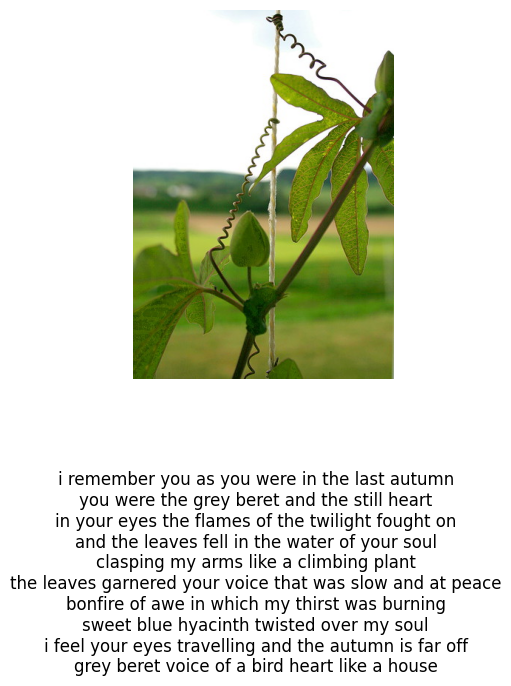

In [49]:
num_lines = image_json[idx]["poem"].count("\n") + 1
target_height = 25*num_lines

# display image
img = Image.open(DATA_PATH + "poem_images/" + str(image_json[idx]["id"]) + ".jpg")
plt.imshow(img)
plt.axis('off')
plt.figtext(0.5, -target_height/np.array(img).shape[0], image_json[idx]["poem"], horizontalalignment='center', fontsize=12)

10

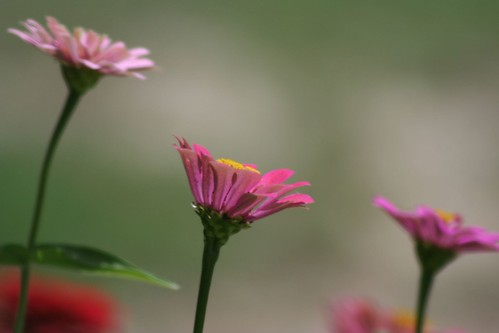

In [ ]:
# display iamge with caption
